In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

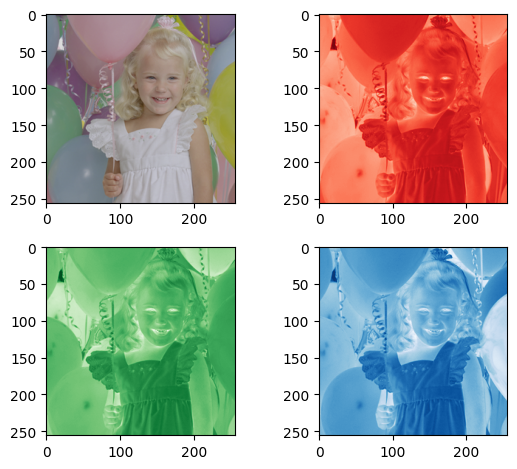

In [12]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGBチャネルの分離
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(image_rgb)
axes[0, 1].imshow(r_channel, cmap='Reds')
axes[1, 0].imshow(g_channel, cmap='Greens')
axes[1, 1].imshow(b_channel, cmap='Blues')

In [16]:
# RGBからCMYKに変換する関数
def rgb_to_cmyk(image_rgb):

    # 各RGBチャネルを0-1に正規化
    image_rgb_normalized = image_rgb / 255.0
    
    # CMYの計算
    c = 1 - image_rgb_normalized[..., 0]
    m = 1 - image_rgb_normalized[..., 1]
    y = 1 - image_rgb_normalized[..., 2]
    
    # Kチャンネルの計算
    k = np.min([c, m, y], axis=0)
    
    # C, M, Yの値をKに基づいて調整
    c = (c - k) / (1 - k + 1e-10)
    m = (m - k) / (1 - k + 1e-10)
    y = (y - k) / (1 - k + 1e-10)
    
		# 0-255の範囲に変換
    cmyk = np.zeros(image_rgb.shape[:2] + (4,), dtype=np.uint8) 
    cmyk[..., 0] = (c * 255).astype(np.uint8)
    cmyk[..., 1] = (m * 255).astype(np.uint8)
    cmyk[..., 2] = (y * 255).astype(np.uint8)
    cmyk[..., 3] = (k * 255).astype(np.uint8)
    
    return cmyk

In [18]:
# 各チャンネルの色を擬似的に再現して表示する
def display_color_channel(channel, color):
    # カラーマップ作成
    blank = np.zeros_like(channel)
    
    if color == 'cyan':
        return np.stack([blank, channel, channel], axis=-1)
    elif color == 'magenta':
        return np.stack([channel, blank, channel], axis=-1)
    elif color == 'yellow':
        return np.stack([channel, channel, blank], axis=-1)
    elif color == 'black':
        return np.stack([channel, channel, channel], axis=-1)

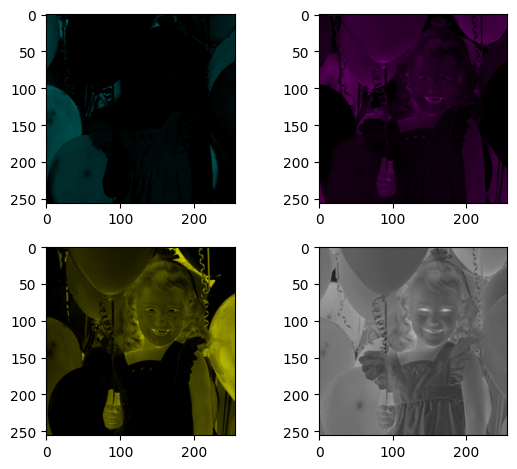

In [21]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# CMYK色空間に変換
image_cmyk = rgb_to_cmyk(image_rgb)

# CMYKチャネルの分離
c_channel, m_channel, y_channel, k_channel = cv2.split(image_cmyk)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(display_color_channel(c_channel, 'cyan'))
axes[0, 1].imshow(display_color_channel(m_channel, 'magenta'))
axes[1, 0].imshow(display_color_channel(y_channel, 'yellow'))
axes[1, 1].imshow(display_color_channel(k_channel, 'black'))